In [2037]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.signal import find_peaks
import pwl_cvr_functions as cvr_func
import copy
import csv

# Set TCD calibration factor (determined from DWL Dopler BoxX manual) and cut-off threshold (erroneous TCD values are set to NaN if below threshold)
TCD_calibration_factor = 192 # TCD calibration factor in cm/s/V
TCD_threshold = 0.07*TCD_calibration_factor # TCD threshold in cm/s

# Parameters to save figures (baseline and 5% CO2) or results CSV 

In [2038]:
save_csv = False
save_summary = False
save_fig = False
csv_filename = 'CVR_data_2min2min.csv'
csv_summary_filename = 'PWL_data_summary.csv'

# Parameters to Lab Chart exported txt file (with columns: Time, CO2, O2, TCD, Pulse, Comments)
### Define the prominence of the end_tidal peaks during baseline and 5% CO2
### Define which comments to use as the beginning and ending of the 1st baseline, 5% CO2, and 2nd baseline periods (i.e. 1st comment = 0, 2nd comment = 1)

In [2039]:
# # Read the file .server_path
data_dir = '/Users/ghayes/Desktop/EyeBrain_PWL/'

# filename = 'sub-001_ses-01_dat-20230227_task-tcd5co2_pwl.txt'
# filepath = data_dir + filename
# CO2prominence_base = 1
# O2prominence_base = 1
# CO2prominence_5co2 = 0.5
# O2prominence_5co2 = 1
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 2
# comment_end_5co2 = 3
# comment_start_baseline2 = 4
# comment_end_baseline2 = 5

# filename = 'sub-002_ses-01_dat-20230210_task-tcd5co2_pwl_200hz.txt'
# filepath = data_dir + filename
# CO2prominence_base = 1
# O2prominence_base = 1
# CO2prominence_5co2 = 0.4
# O2prominence_5co2 = 1
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 2
# comment_end_5co2 = 3
# comment_start_baseline2 = 4
# comment_end_baseline2 = 5

# filename = 'sub-003_ses-01_dat-20230209_task-tcd5co2_pwl.txt'
# filepath = data_dir + filename
# CO2prominence_base = 3
# O2prominence_base = 3
# CO2prominence_5co2 = 1
# O2prominence_5co2 = 3
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 2
# comment_end_5co2 = 3
# comment_start_baseline2 = 4
# comment_end_baseline2 = 5

# filename = 'sub-004_ses-01_dat-20230207_task-tcd5co2_pwl_200hz.txt'
# filepath = data_dir + filename
# CO2prominence_base = 3
# O2prominence_base = 3
# CO2prominence_5co2 = 1
# O2prominence_5co2 = 3
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 1
# comment_end_5co2 = 2
# comment_start_baseline2 = 2
# comment_end_baseline2 = 3

# filename = 'sub-005_ses-01_dat-20230224_task-tcd5co2_pwl.txt'
# filepath = data_dir + filename
# CO2prominence_base = 3
# O2prominence_base = 3
# CO2prominence_5co2 = 0.5
# O2prominence_5co2 = 1
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 2
# comment_end_5co2 = 3
# comment_start_baseline2 = 3
# comment_end_baseline2 = 4

# filename = 'sub-006_ses-01_dat-20230227_task-tcd5co2_pwl.txt'
# filepath = data_dir + filename
# CO2prominence_base = 3
# O2prominence_base = 3
# CO2prominence_5co2 = 1
# O2prominence_5co2 = 1
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 2
# comment_end_5co2 = 3
# comment_start_baseline2 = 4
# comment_end_baseline2 = 5

# filename = 'sub-007_ses-01_dat-20230228_task-tcd5co2_pwl.txt'
# filepath = data_dir + filename
# CO2prominence_base = 3
# O2prominence_base = 3
# CO2prominence_5co2 = 0.5
# O2prominence_5co2 = 1
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 2
# comment_end_5co2 = 3
# comment_start_baseline2 = 4
# comment_end_baseline2 = 5

# filename = 'sub-008_ses-01_dat-20230228_task-tcd5co2_pwl.txt'
# filepath = data_dir + filename
# CO2prominence_base = 3
# O2prominence_base = 3
# CO2prominence_5co2 = 0.5
# O2prominence_5co2 = 1
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 2
# comment_end_5co2 = 3
# comment_start_baseline2 = 4
# comment_end_baseline2 = 5

filename = 'sub-009_ses-01_dat-20230307_task-tcd5co2_pwl.txt'
filepath = data_dir + filename
CO2prominence_base = 3
O2prominence_base = 3
CO2prominence_5co2 = 0.5
O2prominence_5co2 = 1
comment_start_baseline1 = 2
comment_end_baseline1 = 3
comment_start_5co2 = 4
comment_end_5co2 = 5
comment_start_baseline2 = 6
comment_end_baseline2 = 7

# filename = 'sub-010_ses-01_dat-20230320_task-tcd5co2_pwl.txt'
# filepath = data_dir + filename
# CO2prominence_base = 3
# O2prominence_base = 3
# CO2prominence_5co2 = 0.5
# O2prominence_5co2 = 1
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 3
# comment_end_5co2 = 4
# comment_start_baseline2 = 5
# comment_end_baseline2 = 6

# filename = 'sub-011_ses-01_dat-20230328_task-tcd5co2_pwl.txt'
# filepath = data_dir + filename
# CO2prominence_base = 3
# O2prominence_base = 3
# CO2prominence_5co2 = 0.5
# O2prominence_5co2 = 1
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 2
# comment_end_5co2 = 3
# comment_start_baseline2 = 4
# comment_end_baseline2 = 5

# filename = 'sub-012_ses-01_dat-20230330_task-tcd5co2_pwl.txt'
# filepath = data_dir + filename
# CO2prominence_base = 3
# O2prominence_base = 3
# CO2prominence_5co2 = 0.5
# O2prominence_5co2 = 1
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 2
# comment_end_5co2 = 3
# comment_start_baseline2 = 4
# comment_end_baseline2 = 5

# filename = 'sub-013_ses-01_dat-20230331_task-tcd5co2_pwl.txt'
# filepath = data_dir + filename
# CO2prominence_base = 3
# O2prominence_base = 3
# CO2prominence_5co2 = 0.5
# O2prominence_5co2 = 1
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 7
# comment_end_5co2 = 8
# comment_start_baseline2 = 9
# comment_end_baseline2 = 10

# filename = 'sub-001_ses-02_dat-20230418_task-tcd5co2.txt'
# filepath = data_dir + filename
# CO2prominence_base = 3
# O2prominence_base = 3
# CO2prominence_5co2 = 0.5
# O2prominence_5co2 = 1
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 2
# comment_end_5co2 = 3
# comment_start_baseline2 = 4
# comment_end_baseline2 = 5

# filename = 'sub-002_ses-02_dat-20230405_task-tcd5co2_pwl.txt'
# filepath = data_dir + filename
# CO2prominence_base = 3
# O2prominence_base = 3
# CO2prominence_5co2 = 0.5
# O2prominence_5co2 = 1
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 2
# comment_end_5co2 = 3
# comment_start_baseline2 = 4
# comment_end_baseline2 = 5

# filename = 'sub-003_ses-02_dat-20230405_task-tcd5co2_pwl.txt'
# filepath = data_dir + filename
# CO2prominence_base = 3
# O2prominence_base = 3
# CO2prominence_5co2 = 0.5
# O2prominence_5co2 = 1
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 3
# comment_end_5co2 = 5
# comment_start_baseline2 = 6
# comment_end_baseline2 = 7

# filename = 'sub-004_ses-02_dat-20230418_task-tcd5co2.txt'
# filepath = data_dir + filename
# CO2prominence_base = 3
# O2prominence_base = 3
# CO2prominence_5co2 = 0.5
# O2prominence_5co2 = 1
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 2
# comment_end_5co2 = 3
# comment_start_baseline2 = 4
# comment_end_baseline2 = 5

# filename = 'sub-014_ses-01_dat-20230518_task-tcd5co2_pwl.txt'
# filepath = data_dir + filename
# CO2prominence_base = 3
# O2prominence_base = 3
# CO2prominence_5co2 = 0.5
# O2prominence_5co2 = 1
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 2
# comment_end_5co2 = 3
# comment_start_baseline2 = 4
# comment_end_baseline2 = 5

# filename = 'sub-015_ses-01_dat-20230516_task-tcd5co2_pwl.txt'
# filepath = data_dir + filename
# CO2prominence_base = 3
# O2prominence_base = 3
# CO2prominence_5co2 = 0.5
# O2prominence_5co2 = 1
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 2
# comment_end_5co2 = 3
# comment_start_baseline2 = 4
# comment_end_baseline2 = 5

# filename = 'sub-016_ses-01_dat-20230523_task-tcd5co2_pwl.txt'
# filepath = data_dir + filename
# CO2prominence_base = 3
# O2prominence_base = 3
# CO2prominence_5co2 = 0.5
# O2prominence_5co2 = 1
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 2
# comment_end_5co2 = 3
# comment_start_baseline2 = 5
# comment_end_baseline2 = 6

# filename = 'sub-017_ses-01_dat-20230526_task-tcd5co2_pwl.txt'
# filepath = data_dir + filename
# CO2prominence_base = 3
# O2prominence_base = 3
# CO2prominence_5co2 = 0.5
# O2prominence_5co2 = 1
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 2
# comment_end_5co2 = 3
# comment_start_baseline2 = 4
# comment_end_baseline2 = 5

# filename = 'sub-018_ses-01_dat-20230526_task-tcd5co2_pwl.txt'
# filepath = data_dir + filename
# CO2prominence_base = 3
# O2prominence_base = 3
# CO2prominence_5co2 = 0.5
# O2prominence_5co2 = 1
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 2
# comment_end_5co2 = 3
# comment_start_baseline2 = 4
# comment_end_baseline2 = 5

# filename = 'sub-019_ses-01_dat-20230530_task-tcd5co2_pwl.txt'
# filepath = data_dir + filename
# CO2prominence_base = 3
# O2prominence_base = 3
# CO2prominence_5co2 = 0.5
# O2prominence_5co2 = 1
# comment_start_baseline1 = 1
# comment_end_baseline1 = 2
# comment_start_5co2 = 3
# comment_end_5co2 = 4
# comment_start_baseline2 = 5
# comment_end_baseline2 = 6

# filename = 'sub-020_ses-01_dat-20230531_task-tcd5co2_pwl.txt'
# filepath = data_dir + filename
# CO2prominence_base = 3
# O2prominence_base = 3
# CO2prominence_5co2 = 1.7
# O2prominence_5co2 = 1
# comment_start_baseline1 = 0
# comment_end_baseline1 = 1
# comment_start_5co2 = 2
# comment_end_5co2 = 3
# comment_start_baseline2 = 4
# comment_end_baseline2 = 5

print(filepath)

/Users/ghayes/Desktop/EyeBrain_PWL/sub-009_ses-01_dat-20230307_task-tcd5co2_pwl.txt


# Take a look at the data and comments

In [2040]:
# Read text file into pandas DataFrame
cols = pd.read_csv(filepath, sep='\t', nrows=5, header=(4)).columns
# Delete the first column
cols = cols.drop(cols[0])
cols = cols.insert(0, 'Time')
# Add a column to the DataFrame
cols = cols.insert(5, 'Comments')
# Read the file into a DataFrame
df = pd.read_csv(filepath, sep='\t',skiprows=(0,1,2,3,4,5),header=None, names=cols)  

In [2041]:
# List the rows with comments
rows_comments=df[df['Comments'].notnull()]
print('--- COMMENTS ---')
print(rows_comments)

--- COMMENTS ---
           Time  Channel 1 -CO2  Channel 2 - O2  Channel 3 - TCD  \
13229    66.145        2.826875        19.96875         0.000625   
37609   188.045        4.572813        16.03125         0.110937   
72719   363.595        0.078125        20.68125         0.126406   
106289  531.445        4.239062        15.84688         0.223750   
109379  546.895        4.474375        15.86875         0.208125   
144259  721.295        5.750938        16.70625         0.208750   
146259  731.295        5.806562        16.66562         0.192500   
185299  926.495        4.471250        15.46250         0.138125   

        Channel 4 - Pulse      Comments  
13229           -0.063562     #* MA-ON   
37609           -0.002938    #* MA-OFF   
72719           -0.039875     #* MA-ON   
106289           0.077125    #* MA-OFF   
109379           0.109562   #* 5CO2-ON   
144259           0.099562  #* 5CO2-OFF   
146259           0.011375     #* MA-ON   
185299           0.149938    #* MA

In [2042]:
# Length of 5% co2 breathing
df_baseline1 = cvr_func.get_data_between_comments(df, comment1_index=comment_start_baseline1, comment2_index=comment_end_baseline1, crop_start=0, crop_end=1)
df_5co2 = cvr_func.get_data_between_comments(df, comment1_index=comment_start_5co2, comment2_index=comment_end_5co2, crop_start=0, crop_end=1)
df_baseline2 = cvr_func.get_data_between_comments(df, comment1_index=comment_start_baseline2, comment2_index=comment_end_baseline2, crop_start=0, crop_end=1)

# Print the length of each segment
print('--- LENGTH OF BASELINE1 MA BREATHING ---')
len_base1 = len(df_baseline1)/200
print('Baseline 1: ', len_base1, 's')

print('--- LENGTH OF 5% CO2 BREATHING ---')
len_5co2 = len(df_5co2)/200
print('5% CO2: ', len_5co2, 's')

print('--- LENGTH OF BASELINE2 MA BREATHING ---')
len_base2 = len(df_baseline2)/200
print('Baseline 2: ', len_base2, 's')


--- LENGTH OF BASELINE1 MA BREATHING ---
Baseline 1:  166.85 s
--- LENGTH OF 5% CO2 BREATHING ---
5% CO2:  173.4 s
--- LENGTH OF BASELINE2 MA BREATHING ---
Baseline 2:  194.2 s


/Users/ghayes/Documents/GitHub/End-Tidal-Extraction/pwl-analysis/pwl_cvr_functions.py:139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_rate = 1/(float(dataframe.iloc[2][0]) - float(dataframe.iloc[1][0]))


# Crop the data into 1st baseline, 5% CO2, and 2nd baseline periods

In [2043]:
# Crop the data into relevant sections

# df_baseline1 = cvr_func.get_data_between_comments(df, comment1_index=comment_start_baseline1, comment2_index=comment_end_baseline1, crop_start=70, crop_end=10)
# df_5co2 = cvr_func.get_data_between_comments(df, comment1_index=comment_start_5co2, comment2_index=comment_end_5co2, crop_start=5, crop_end=75)
# df_baseline2 = cvr_func.get_data_between_comments(df, comment1_index=comment_start_baseline2, comment2_index=comment_end_baseline2, crop_start=20, crop_end=10)
print(len(df))
df_baseline1 = cvr_func.get_data_window_between_comments(df, comment1_index=comment_start_baseline1, comment2_index=comment_end_baseline1, crop_start_seconds=30, window_length_seconds=120)
df_5co2 = cvr_func.get_data_window_between_comments(df, comment1_index=comment_start_5co2, comment2_index=comment_end_5co2, crop_start_seconds=30, window_length_seconds=120)
df_baseline2 = cvr_func.get_data_window_between_comments(df, comment1_index=comment_start_baseline2, comment2_index=comment_end_baseline2, crop_start_seconds=20, window_length_seconds=90)

print('--- 5% CO2 DATA ---')
# Print the firt element of time
print('Start of 5% CO2 window:', df_5co2.iloc[0][0], 's')
# Print the last element of time
print('End of 5% CO2 window:', df_5co2.iloc[-1][0], 's')
print('Length of 5% CO2 window:', float(df_5co2.iloc[-1][0]) - float(df_5co2.iloc[0][0]), 's')

print('--- BASELINE 1 DATA ---')
# Print the firt element of time
print('Start of baseline 1 window:', df_baseline1.iloc[0][0], 's')
# Print the last element of time
print('End of baseline 1 window:', df_baseline1.iloc[-1][0], 's')
print('Length of baseline 1 window:', float(df_baseline1.iloc[-1][0]) - float(df_baseline1.iloc[0][0]), 's')

print('--- BASELINE 2 DATA ---')
# Print the firt element of time
print('Start of baseline 2 window:', df_baseline2.iloc[0][0], 's')
# Print the last element of time
print('End of baseline 2 window:', df_baseline2.iloc[-1][0], 's')
print('Length of baseline 2 window:', float(df_baseline2.iloc[-1][0]) - float(df_baseline2.iloc[0][0]), 's')

189370
--- 5% CO2 DATA ---
Start of 5% CO2 window: 576.895 s
End of 5% CO2 window: 696.89 s
Length of 5% CO2 window: 119.995 s
--- BASELINE 1 DATA ---
Start of baseline 1 window: 393.595 s
End of baseline 1 window: 513.59 s
Length of baseline 1 window: 119.995 s
--- BASELINE 2 DATA ---
Start of baseline 2 window: 751.295 s
End of baseline 2 window: 841.29 s
Length of baseline 2 window: 89.995 s


/Users/ghayes/Documents/GitHub/End-Tidal-Extraction/pwl-analysis/pwl_cvr_functions.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_rate = 1/(float(dataframe.iloc[2][0]) - float(dataframe.iloc[1][0]))
/var/folders/ck/546jljvj7g3cptvhpxg8p2qh0000gn/T/ipykernel_30604/1906933613.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Start of 5% CO2 window:', df_5co2.iloc[0][0], 's')
/var/folders/ck/546jljvj7g3cptvhpxg8p2qh0000gn/T/ipykernel_30604/1906933613.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as label

In [2044]:
### BASELINE 1 DATA ###

#get raw TCD data
TCD_baseline1 = df_baseline1.iloc[:,3].astype(float)*TCD_calibration_factor
#get raw CO2 and O2 data
CO2_baseline1 = df_baseline1.iloc[:,1].astype(float)
O2_baseline1 = df_baseline1.iloc[:,2].astype(float)
#get raw PPG data
PPG_baseline1 = df_baseline1.iloc[:,4].astype(float)


In [2045]:
### 5% CO2 DATA ###

#get raw TCD data
TCD_5co2 = df_5co2.iloc[:,3].astype(float)*TCD_calibration_factor
#get raw CO2 and O2 data
CO2_5co2 = df_5co2.iloc[:,1].astype(float)
O2_5co2 = df_5co2.iloc[:,2].astype(float)
#get raw PPG 
PPG_5co2 = df_5co2.iloc[:,4].astype(float)

# Use Fourier Transforms to determine average breathing rate and pulse 
## A low-pass filter can also be used to remove noise from the data, however this is currently not employed

The average baseline breathing rate is: 0.10833333333343186 Hz 1/br_avg: 9.230769230760837 s
Breaths per minute: 6.500000000005912 BPM


/var/folders/ck/546jljvj7g3cptvhpxg8p2qh0000gn/T/ipykernel_30604/2127892862.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_rate = 1/(float(df_5co2.iloc[2][0]) - float(df_5co2.iloc[1][0]))


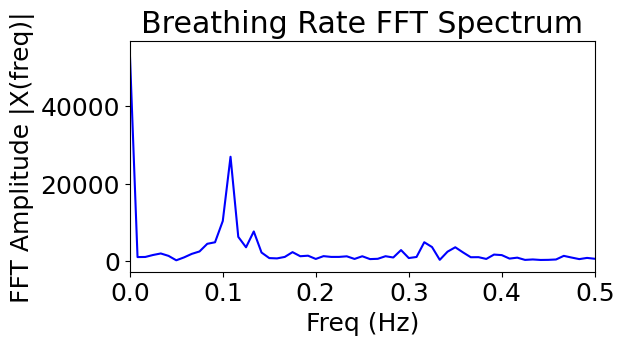

The average tcd rate is: 1.0833333333343187 Hz 0.9230769230760835 s
Pulses per minute: 65.00000000005912 BPM


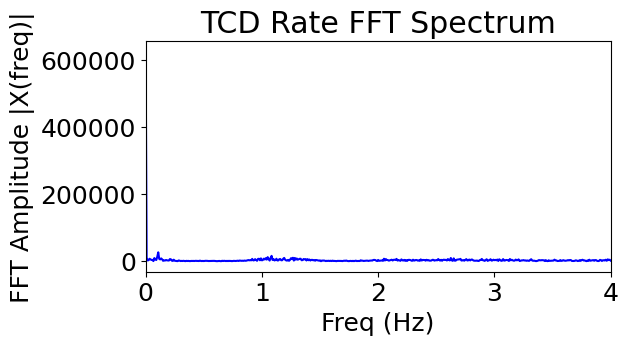

In [2046]:
# Determine average breathing rate during baseline to determine the end-tidal search window using a fourier transform
#baseline_co2_data = pd.concat([df_baseline1.iloc[:,1], df_baseline2.iloc[:,1]])
baseline_co2_data = df_baseline1.iloc[:,1].astype(float)
sample_rate = 1/(float(df_5co2.iloc[2][0]) - float(df_5co2.iloc[1][0]))

br_avg, _, _, _ = cvr_func.get_average_breathing_rate(baseline_co2_data, sample_rate)
cvr_func.plot_breathing_rate_fft(baseline_co2_data, sample_rate)

tcd_avg, _, _, _ = cvr_func.get_average_tcd_rate(TCD_baseline1, sample_rate)
cvr_func.plot_tcd_fft(TCD_baseline1, sample_rate)

In [2047]:
# Filter Data
filtered_TCD_baseline1 = cvr_func.low_pass_filter(TCD_baseline1, 200, 3)

In [2048]:
print('baseline TCD min before', min(TCD_baseline1))
#replace values in TCD_baseline1 below threshold with NaN
TCD_baseline1_th = copy.deepcopy(TCD_baseline1)
TCD_baseline1_th[TCD_baseline1_th < TCD_threshold] = np.nan
print('baseline TCD min after threshold', min(TCD_baseline1_th))

print('filtered baseline min before', min(filtered_TCD_baseline1))
#replace values in TCD_baseline1 below threshold with NaN
filtered_TCD_baseline1_th = copy.deepcopy(filtered_TCD_baseline1)
filtered_TCD_baseline1_th[filtered_TCD_baseline1_th < TCD_threshold] = np.nan
print('filtered baseline min after threshold', min(filtered_TCD_baseline1_th))

# print('5% CO2 TCD min before', min(TCD_5co2))
#replace values in TCD_baseline1 below threshold with NaN
TCD_5co2_th = copy.deepcopy(TCD_5co2)
TCD_5co2_th[TCD_5co2_th < TCD_threshold] = np.nan
print('5% CO2 TCD min after threshold', min(TCD_5co2_th))

baseline TCD min before -3.7200019200000005
baseline TCD min after threshold 13.44000192
filtered baseline min before 19.138164998361027
filtered baseline min after threshold 19.138164998361027
5% CO2 TCD min after threshold 13.620000000000001


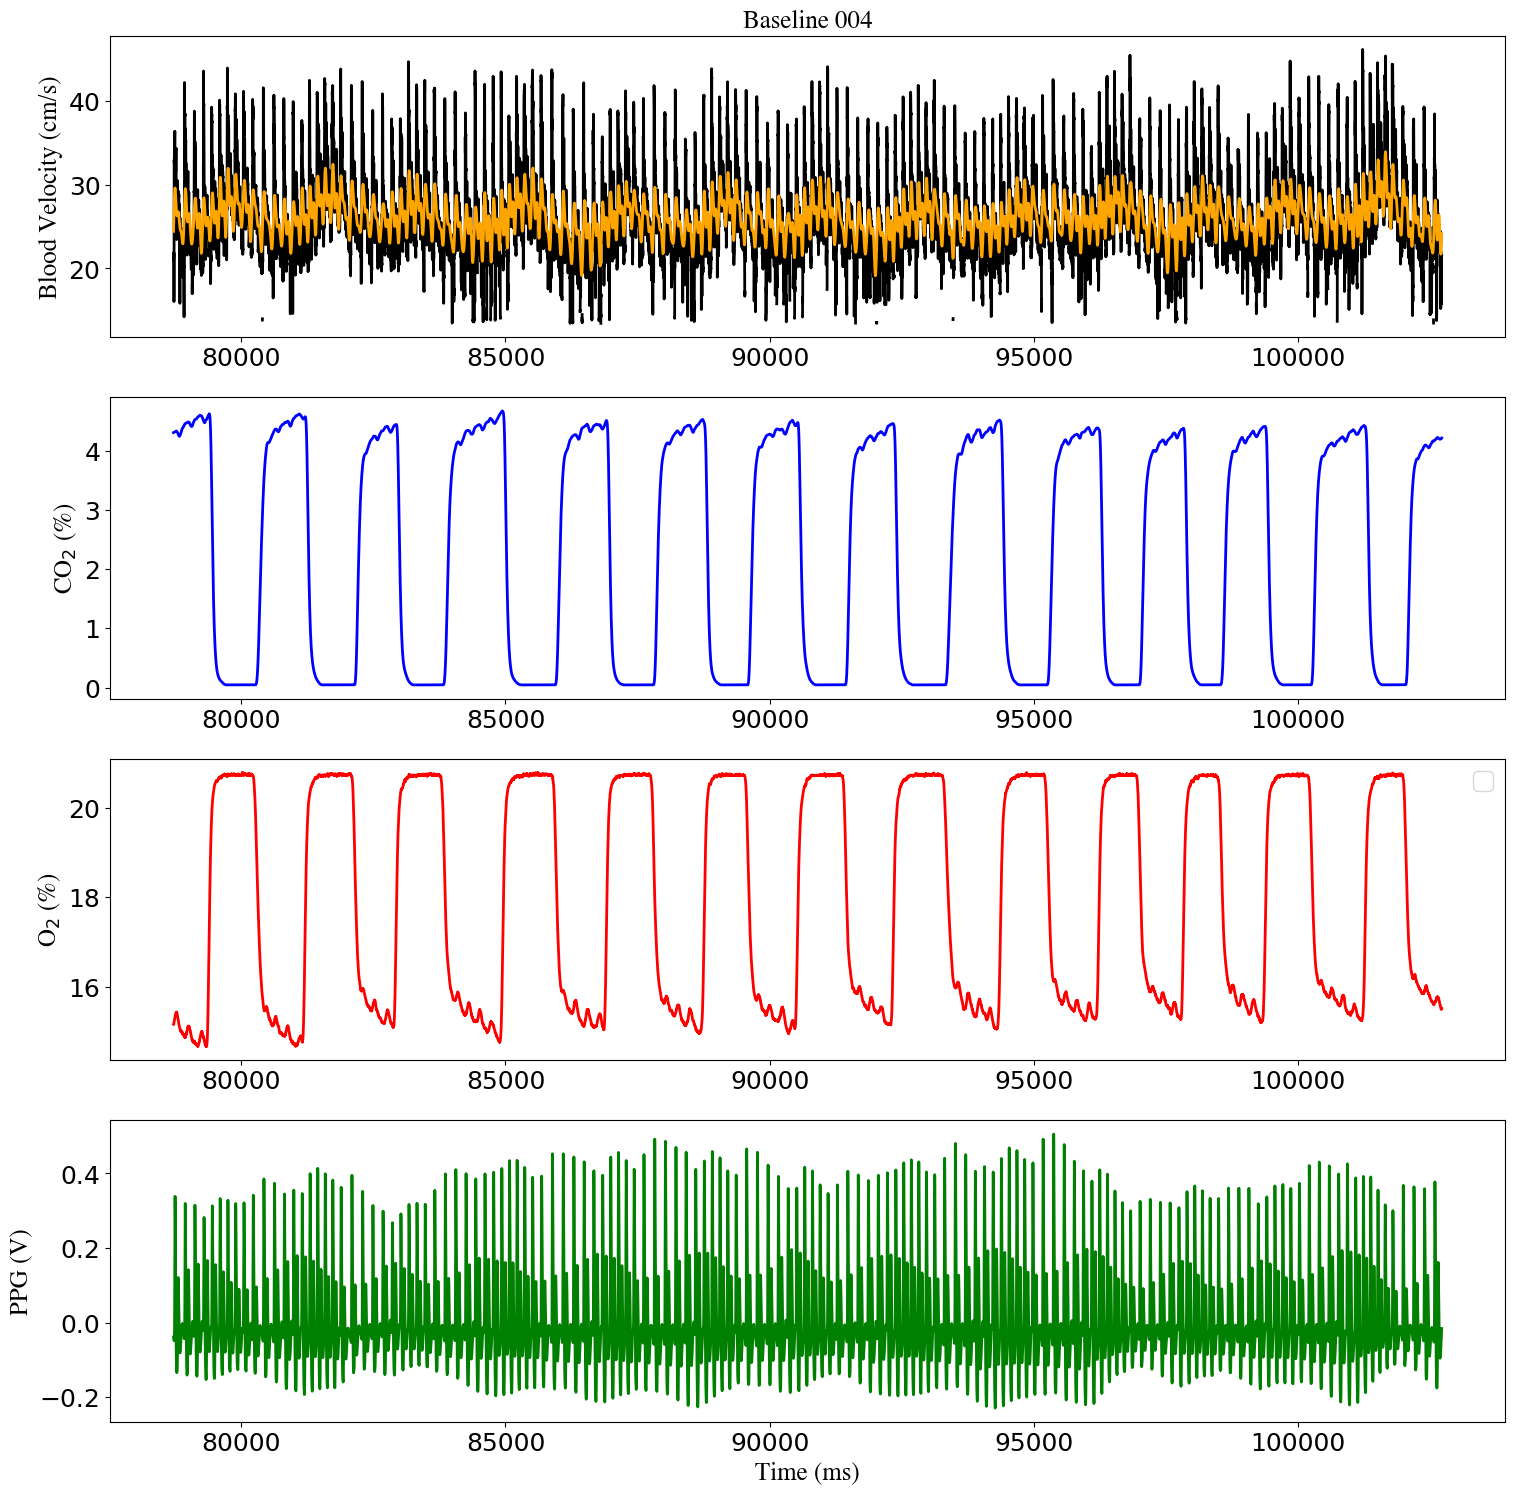

In [2049]:
#plot
fig = plt.figure()

#plot parameters
fig.set_figheight(18)
fig.set_figwidth(18)
tfont = {'fontname':'Times'}

#plot TCD MCAv
ax1 = fig.add_subplot(411)
ax1.set_title("Baseline 004", fontsize=18, **tfont)       
ax1.set_ylabel('Blood Velocity (cm/s)', fontsize=18, **tfont)
TCD_baseline1_th.plot(c="black", lw=2)
filtered_TCD_baseline1_th.plot(c="orange", lw=2)

#plot CO2 percentage
ax2 = fig.add_subplot(412)   
ax2.set_ylabel('CO$_{2}$ (%)', fontsize=18, **tfont)
CO2_baseline1.plot(c="blue", lw=2)

#plot O2 percentage
ax3 = fig.add_subplot(413)     
ax3.set_ylabel('O$_{2}$ (%)', fontsize=18, **tfont)
O2_baseline1.plot(c="red", lw=2)
ax3.legend('')

#plot PPG readout(V)
ax4 = fig.add_subplot(414)   
ax4.set_xlabel('Time (ms)', fontsize=18, **tfont)    
ax4.set_ylabel('PPG (V)', fontsize=18, **tfont)
PPG_baseline1.plot(c="green", lw=2)

plt.show()

In [2050]:
# Define search window as 0.5 seconds longer than the average breathing rate
search_window = (1/br_avg)*0.6 #- 3.5 # seconds
print('Sample rate:', sample_rate, 'Hz')
print('Search window:', search_window, 'seconds')

Sample rate: 200.0000000001819 Hz
Search window: 5.5384615384565015 seconds


# Determine the end tidal points and mean MCA velocity within baseline 1 and 5% CO2 periods

In [2051]:
####################
#### BASELINE 1 ####
####################

# Get CO2 end tidal peaks from the baseline data
CO2peaks_inds, CO2peaks_vals, CO2peaks_df = cvr_func.get_endtidal_peaks(np.array(CO2_baseline1), CO2_baseline1.index[0], search_window=search_window, sample_rate=200, height=0, prominence=CO2prominence_base)
# Get the O2 end tidal valleys from the baseline data
O2valleys_inds, O2valleys_vals, O2valleys_df = cvr_func.get_endtidal_valleys(np.array(O2_baseline1), O2_baseline1.index[0], search_window=search_window, sample_rate=200, height=-30, prominence=O2prominence_base)

# Get the mean of the thresholded TCD data
MCAvmean_base = np.mean(TCD_baseline1_th)



In [2052]:
# make a deep copy of the peaks of the CO2
CO2peaks_df_baseline1 = copy.deepcopy(CO2peaks_df)
O2valleys_df_baseline1 = copy.deepcopy(O2valleys_df)

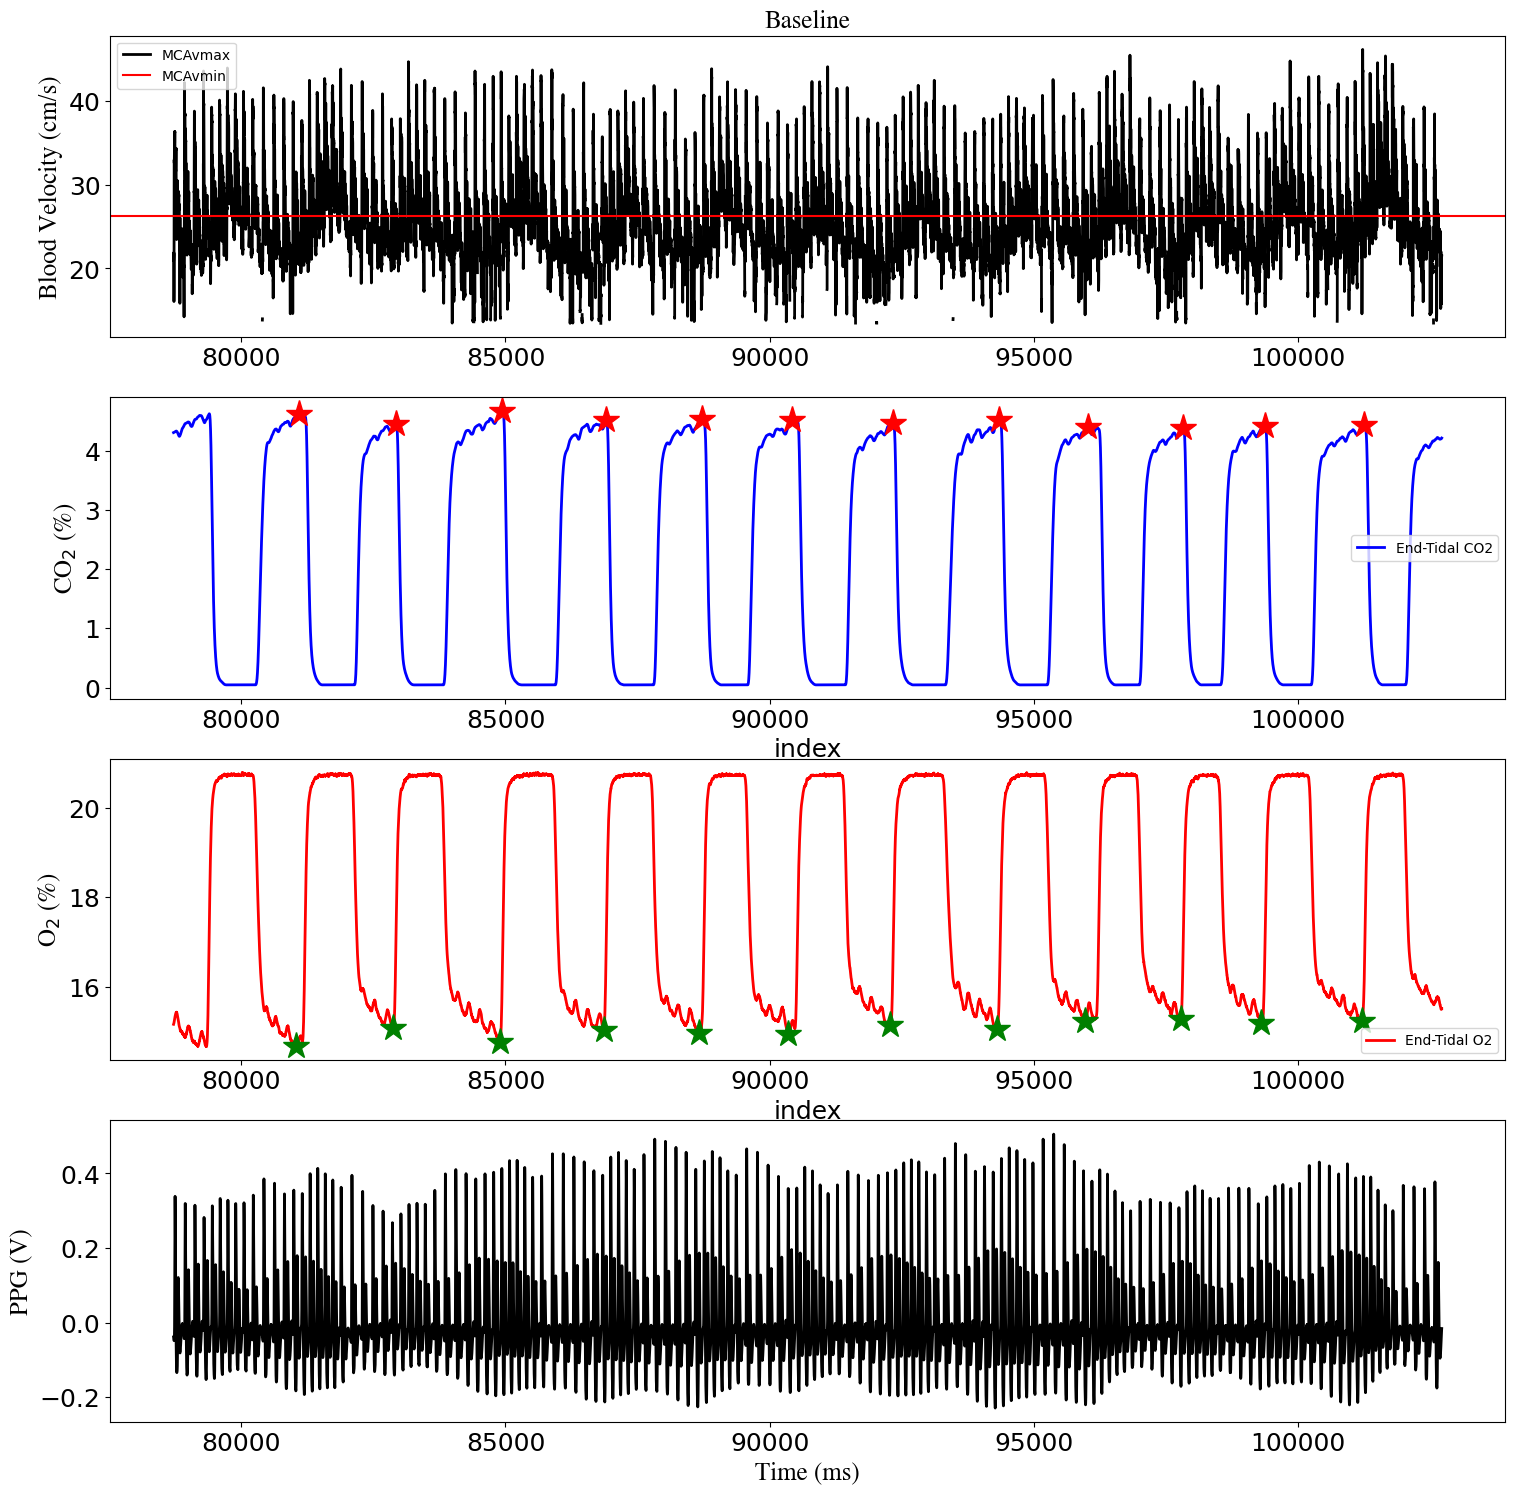

In [2053]:
#plot
fig = plt.figure()

#plot parameters
fig.set_figheight(18)
fig.set_figwidth(18)
tfont = {'fontname':'Times'}

#plot TCD MCAv
ax1 = fig.add_subplot(411)
ax1.set_title("Baseline", fontsize=18, **tfont)       
ax1.set_ylabel('Blood Velocity (cm/s)', fontsize=18, **tfont)
TCD_baseline1_th.plot(c="black", lw=2)
ax1.axhline(y=MCAvmean_base, color='r', linestyle='-', label='MCAvmean')
ax1.legend(['MCAvmax', 'MCAvmin', 'MCAvmean'], fontsize=10)

#plot CO2 percentage
ax2 = fig.add_subplot(412)   
ax2.set_ylabel('CO$_{2}$ (%)', fontsize=18, **tfont)
CO2_baseline1.plot(c="blue", lw=2)
CO2peaks_df.plot(ax=ax2,x='index', y = 'val', marker='*',linestyle='None',markersize = 20.0, color = 'r')
ax2.legend(['End-Tidal CO2'], fontsize=10)


#plot O2 percentage
ax3 = fig.add_subplot(413)     
ax3.set_ylabel('O$_{2}$ (%)', fontsize=18, **tfont)
O2_baseline1.plot(c="red", lw=2)
O2valleys_df.plot(ax=ax3,x='index', y = 'val', marker='*',linestyle='None',markersize = 20.0, color = 'g')
ax3.legend(['End-Tidal O2'], fontsize=10)


#plot PPG readout(V)
ax4 = fig.add_subplot(414)   
ax4.set_xlabel('Time (ms)', fontsize=18, **tfont)    
ax4.set_ylabel('PPG (V)', fontsize=18, **tfont)
PPG_baseline1.plot(c="black", lw=2)

plt.show()

if save_fig == True:
    # Create folder if it doesn't exist
    if not os.path.exists('CVR_figures'):
        os.makedirs('CVR_figures')
    # Save the figure in the folder
    fig.savefig('CVR_figures/' + filename + '_baseline1.png')

In [2054]:
# Get the mean values of the CO2 and O2 end tidal peaks
CO2_mean_base = np.mean(CO2peaks_vals)
O2_mean_base = np.mean(O2valleys_vals)


print('--- BASELINE 1 DATA ---')
print('end tidal CO2 mean:', CO2_mean_base, '%')
print('end tidal O2 mean:', O2_mean_base, '%')
print('MCAvmean mean:', MCAvmean_base, 'cm s-1')

--- BASELINE 1 DATA ---
end tidal CO2 mean: 4.4926821666666665 %
end tidal O2 mean: 15.043228333333333 %
MCAvmean mean: 26.297920743968874 cm s-1


In [2055]:
####################
#### 5% CO2 ####
####################

# Get CO2 end tidal peaks from the baseline data
CO2peaks_inds, CO2peaks_vals, CO2peaks_df = cvr_func.get_endtidal_peaks(np.array(CO2_5co2), CO2_5co2.index[0], search_window=search_window, sample_rate=200, height=0, prominence=CO2prominence_5co2)
# Get the O2 end tidal valleys from the baseline data
O2valleys_inds, O2valleys_vals, O2valleys_df = cvr_func.get_endtidal_valleys(np.array(O2_5co2), O2_5co2.index[0], search_window=search_window, sample_rate=200, height=-20, prominence=O2prominence_5co2)

# Get the mean of the thresholded TCD data
MCAvmean_5co2 = np.mean(TCD_5co2_th)

CO2_mean_5co2 = np.mean(CO2peaks_vals)
O2_mean_5co2 = np.mean(O2valleys_vals)

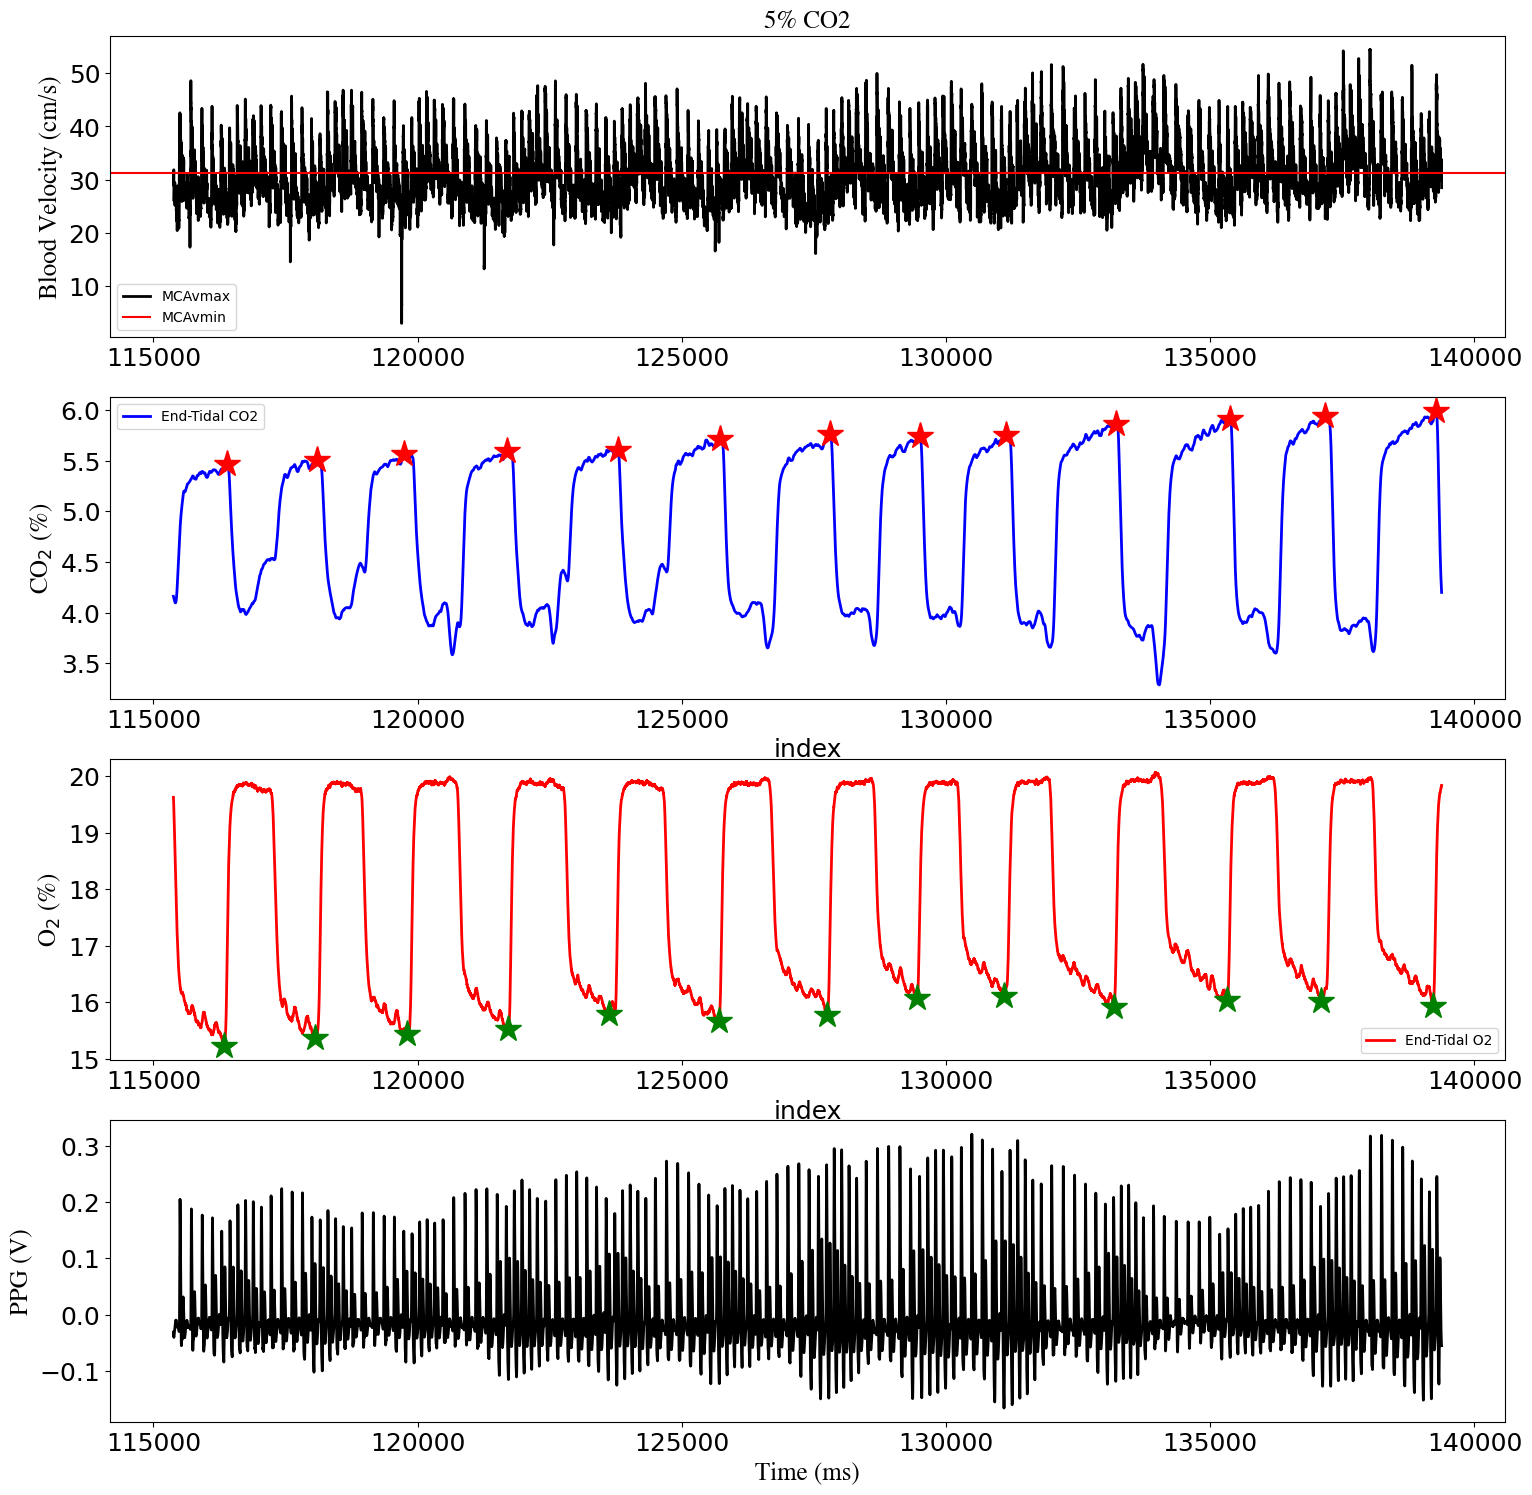

In [2056]:
#plot
fig = plt.figure()

#plot parameters
fig.set_figheight(18)
fig.set_figwidth(18)
tfont = {'fontname':'Times'}

#plot TCD MCAv
ax1 = fig.add_subplot(411)
ax1.set_title("5% CO2", fontsize=18, **tfont)       
ax1.set_ylabel('Blood Velocity (cm/s)', fontsize=18, **tfont)
TCD_5co2.plot(c="black", lw=2)
ax1.axhline(y=MCAvmean_5co2, color='r', linestyle='-', label='MCAvmean')
ax1.legend(['MCAvmax', 'MCAvmin', 'MCAvmean'], fontsize=10)

#plot CO2 percentage
ax2 = fig.add_subplot(412)   
ax2.set_ylabel('CO$_{2}$ (%)', fontsize=18, **tfont)
CO2_5co2.plot(c="blue", lw=2)
CO2peaks_df.plot(ax=ax2,x='index', y = 'val', marker='*',linestyle='None',markersize = 20.0, color = 'r')
ax2.legend(['End-Tidal CO2'], fontsize=10)


#plot O2 percentage
ax3 = fig.add_subplot(413)     
ax3.set_ylabel('O$_{2}$ (%)', fontsize=18, **tfont)
O2_5co2.plot(c="red", lw=2)
O2valleys_df.plot(ax=ax3,x='index', y = 'val', marker='*',linestyle='None',markersize = 20.0, color = 'g')
ax3.legend(['End-Tidal O2'], fontsize=10)


#plot PPG readout(V)
ax4 = fig.add_subplot(414)   
ax4.set_xlabel('Time (ms)', fontsize=18, **tfont)    
ax4.set_ylabel('PPG (V)', fontsize=18, **tfont)
PPG_5co2.plot(c="black", lw=2)

plt.show()

if save_fig == True:
    # Create folder if it doesn't exist
    if not os.path.exists('CVR_figures'):
        os.makedirs('CVR_figures')
    # Save the figure in the folder
    fig.savefig('CVR_figures/' + filename + '_5co2.png')

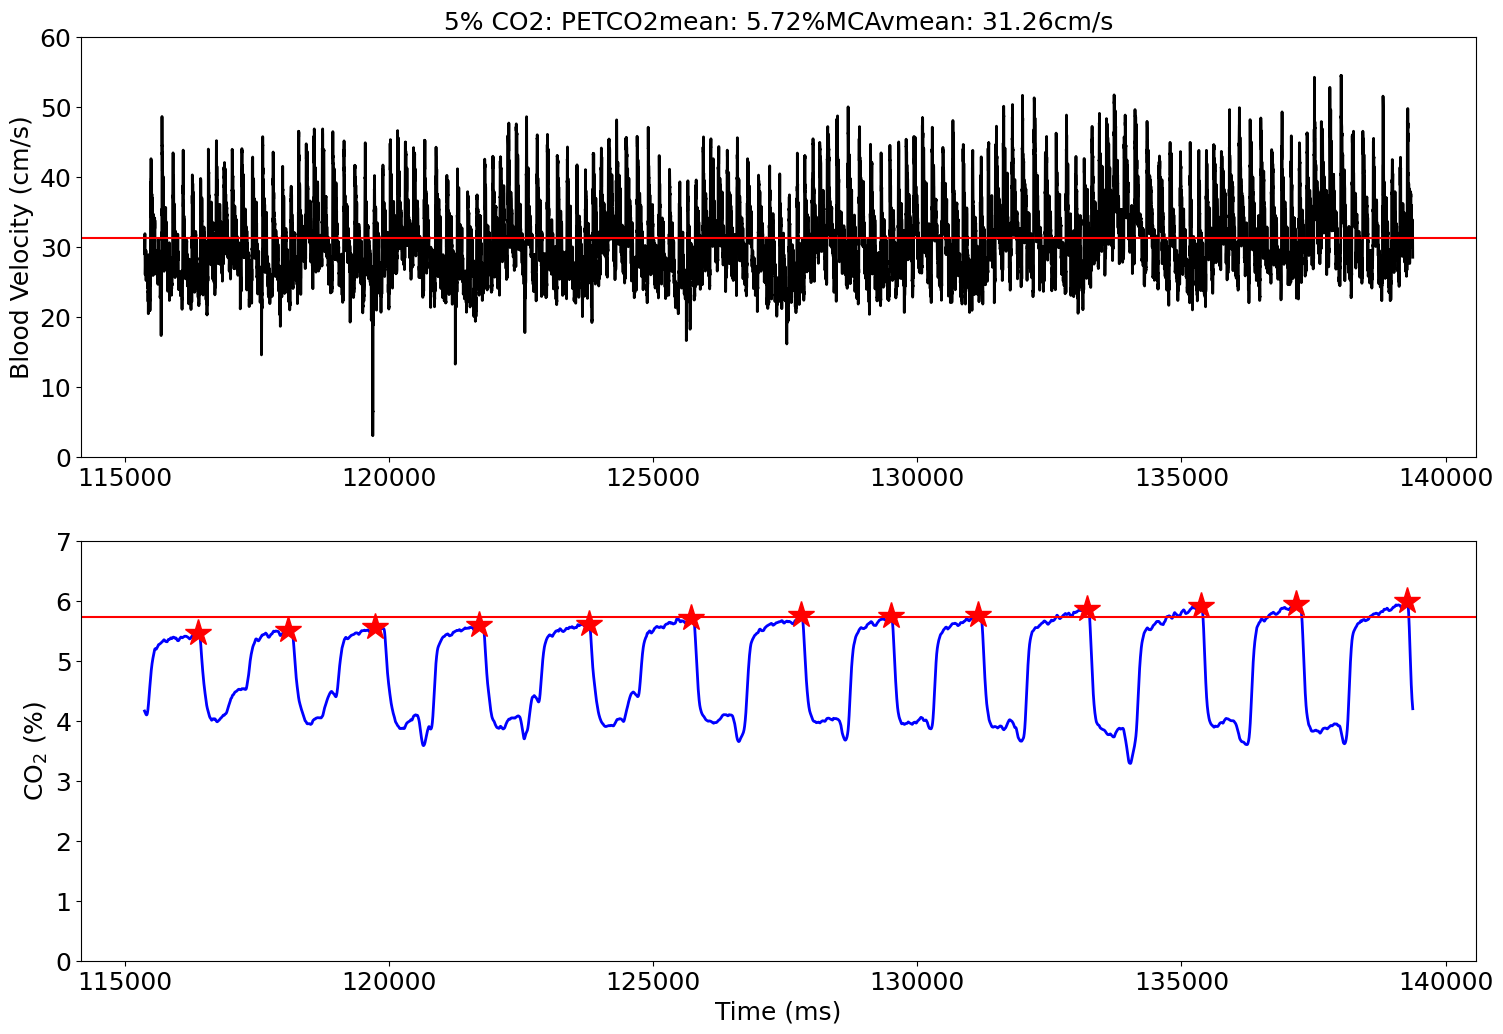

In [2057]:
# plot the tcd blood velocity and end tidal CO2 only at 5% CO2
fig, ax = plt.subplots(2, 1, figsize=(18, 12))
ax[0].plot(TCD_5co2, c="black", lw=2)
# include the mean blood velocity and the mean end tidal CO2 in the title
ax[0].set_title('5% CO2: PETCO2mean: ' + str(round(CO2_mean_5co2, 2)) + '%' + 'MCAvmean: ' + str(round(MCAvmean_5co2, 2)) + 'cm/s', fontsize=18)

# plot the mean blood velocity as a red line
ax[0].axhline(y=MCAvmean_5co2, color='r', linestyle='-', label='MCAvmean')

ax[0].set_ylabel('Blood Velocity (cm/s)', fontsize=18)

ax[1].plot(CO2_5co2, c="blue", lw=2)
# plot the end tidal CO2 peaks as red stars
ax[1].plot(CO2peaks_df['index'], CO2peaks_df['val'], marker='*',linestyle='None',markersize = 20.0, color = 'r')
# plot the mean end tidal CO2 on the plot
ax[1].axhline(y=CO2_mean_5co2, color='r', linestyle='-', label='CO2mean')

#set the y axis limits from 0 to 60
ax[0].set_ylim(0, 60)

#set the y axis limits from 0 to 6
ax[1].set_ylim(0, 7)

ax[1].set_ylabel('CO$_{2}$ (%)', fontsize=18)
ax[1].set_xlabel('Time (ms)', fontsize=18)
plt.show()


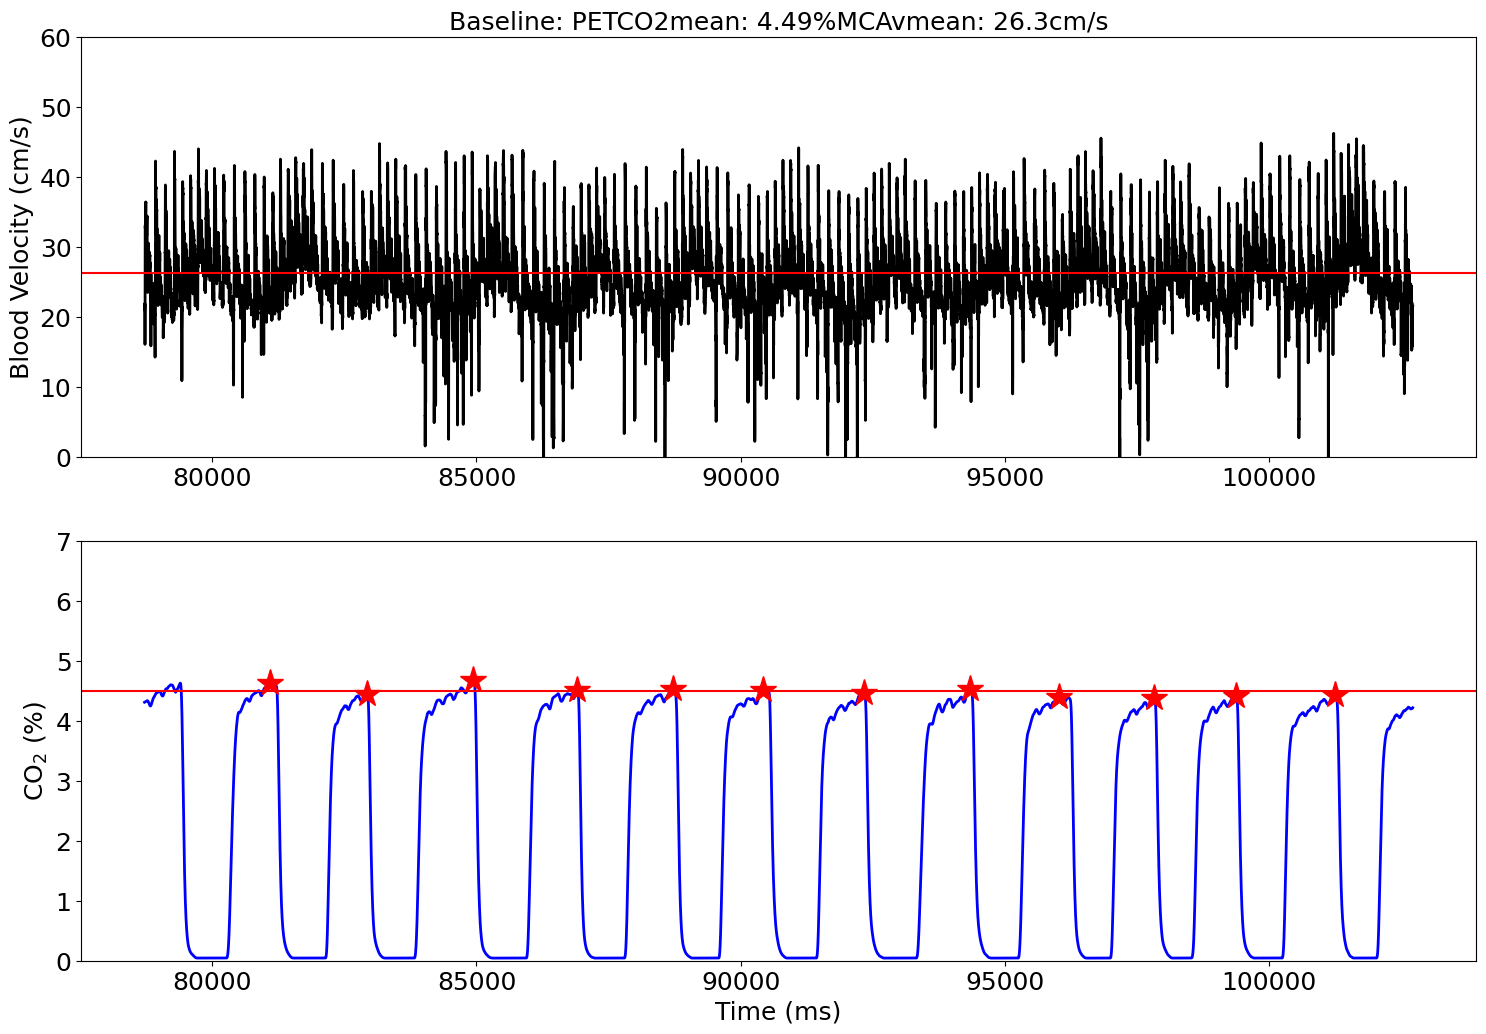

In [2058]:
# plot the tcd blood velocity and end tidal CO2 only at baseline

fig, ax = plt.subplots(2, 1, figsize=(18, 12))
ax[0].plot(TCD_baseline1, c="black", lw=2)
# include the mean blood velocity and the mean end tidal CO2 in the title
ax[0].set_title('Baseline: PETCO2mean: ' + str(round(CO2_mean_base, 2)) + '%' + 'MCAvmean: ' + str(round(MCAvmean_base, 2)) + 'cm/s', fontsize=18)

# plot the mean blood velocity as a red line
ax[0].axhline(y=MCAvmean_base, color='r', linestyle='-', label='MCAvmean')

ax[0].set_ylabel('Blood Velocity (cm/s)', fontsize=18)

ax[1].plot(CO2_baseline1, c="blue", lw=2)
# plot the end tidal CO2 peaks at baseline as red stars
ax[1].plot(CO2peaks_df_baseline1['index'], CO2peaks_df_baseline1['val'], marker='*',linestyle='None',markersize = 20.0, color = 'r')
# plot the mean end tidal CO2 on the plot
ax[1].axhline(y=CO2_mean_base, color='r', linestyle='-', label='CO2mean')

#set the y axis limits from 0 to 60
ax[0].set_ylim(0, 60)

#set the y axis limits from 0 to 6
ax[1].set_ylim(0, 7)


ax[1].set_ylabel('CO$_{2}$ (%)', fontsize=18)
ax[1].set_xlabel('Time (ms)', fontsize=18)
plt.show()


# Calculate the mean end-tidals, MCA velocity, stimulus index, CVR (percentage, %/mmHg, and %/SI)

In [2059]:
# Get the mean values of the CO2 and O2 end tidal peaks
CO2_mean_5co2 = np.mean(CO2peaks_vals)
O2_mean_5co2 = np.mean(O2valleys_vals)

print('--- 5% CO2 DATA ---')
print('end tidal CO2 mean:', CO2_mean_5co2, '%')
print('end tidal O2 mean:', O2_mean_5co2, '%')
print('MCAvmean_5O2:', MCAvmean_5co2, 'cm s-1')

--- 5% CO2 DATA ---
end tidal CO2 mean: 5.723774153846152 %
end tidal O2 mean: 15.761777692307692 %
MCAvmean_5O2: 31.260545066364394 cm s-1


In [2060]:
# Convert the percentage gas values to mmHg
P_oxford = 1012.2 # hPa
mmHg_per_hPa = 0.75006157584566
P_conversion_perc2mmHg = P_oxford*mmHg_per_hPa/100
print('Conversion factor:', P_conversion_perc2mmHg, 'mmHg/%')

print('--- BASELINE DATA ---')
print('end tidal CO2 mean:', CO2_mean_base*P_conversion_perc2mmHg, 'mmHg')
print('end tidal O2 mean:', O2_mean_base*P_conversion_perc2mmHg, 'mmHg')
print('Stimulus index:', CO2_mean_base/O2_mean_base)
print('MCAvmean mean_base:', MCAvmean_base, 'cm s-1')

print('--- 5% CO2 DATA ---')
print('end tidal CO2 mean:', CO2_mean_5co2*P_conversion_perc2mmHg, 'mmHg')
print('end tidal O2 mean:', O2_mean_5co2*P_conversion_perc2mmHg, 'mmHg')
print('Stimulus index:', CO2_mean_5co2/O2_mean_5co2)
print('MCAvmean mean_5CO2:', MCAvmean_5co2, 'cm s-1')

Conversion factor: 7.592123270709772 mmHg/%
--- BASELINE DATA ---
end tidal CO2 mean: 34.1089968254528 mmHg
end tidal O2 mean: 114.21004389610057 mmHg
Stimulus index: 0.2986514641083801
MCAvmean mean_base: 26.297920743968874 cm s-1
--- 5% CO2 DATA ---
end tidal CO2 mean: 43.455598949702505 mmHg
end tidal O2 mean: 119.6653592055234 mmHg
Stimulus index: 0.3631426775318343
MCAvmean mean_5CO2: 31.260545066364394 cm s-1


In [2061]:
percent_CVR = 100*((MCAvmean_5co2-MCAvmean_base)/MCAvmean_base)
CVR = 100*((MCAvmean_5co2-MCAvmean_base)/MCAvmean_base)/(CO2_mean_5co2*P_conversion_perc2mmHg-CO2_mean_base*P_conversion_perc2mmHg)

print('Percent CVR change:', percent_CVR, '%')
print('CVR:', CVR, '%/mmHg')

Percent CVR change: 18.870785910074815 %
CVR: 2.0189995957049107 %/mmHg


In [2062]:
CVR_SI = 100*((MCAvmean_5co2-MCAvmean_base)/MCAvmean_base)/((CO2_mean_5co2/O2_mean_5co2)*P_conversion_perc2mmHg-(CO2_mean_base/O2_mean_base)*P_conversion_perc2mmHg)

print('CVR_SI:', CVR_SI)

CVR_SI: 38.541284811474505


# Save the results to a CSV file

In [2063]:
if save_csv == True:
    if os.path.exists(csv_filename):
        with open(csv_filename, 'a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([filename, CO2prominence_base, O2prominence_base, CO2prominence_5co2, O2prominence_5co2, MCAvmean_base, MCAvmean_5co2, CO2_mean_base, CO2_mean_5co2, O2_mean_base, O2_mean_5co2, percent_CVR, CVR, CVR_SI])
    else:
        # Write the header and the data
        with open(csv_filename, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Input filename", "CO2prominence_base", "O2prominence_base", "CO2prominence_5co2", "O2prominence_5co2", "MCAvmean_base", "MCAvmean_5co2", "ETCO2_mean_base", "ETCO2_mean_5co2", "ETO2_mean_base", "ETO2_mean_5co2", "Percent_CVR", "CVR", "CVR_SI"])
            writer.writerow([filename, CO2prominence_base, O2prominence_base, CO2prominence_5co2, O2prominence_5co2, MCAvmean_base, MCAvmean_5co2, CO2_mean_base, CO2_mean_5co2, O2_mean_base, O2_mean_5co2, percent_CVR, CVR, CVR_SI])

In [2064]:
# Save summary of data timeseries to a CSV file

if save_summary == True:
    if os.path.exists(csv_summary_filename):
        with open(csv_summary_filename, 'a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([filename, len_base1, len_5co2, len_base2, comment_start_baseline1, comment_end_baseline1, comment_start_5co2, comment_end_5co2, comment_start_baseline2, comment_end_baseline2])
    else:
        # Write the header and the data
        with open(csv_summary_filename, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Input filename", "Length of baseline1 (s)", "Length of 5 CO2 (s)", "Length of baseline2 (s)", "comment_start_baseline1", "comment_end_baseline1", "comment_start_5co2", "comment_end_5co2", "comment_start_baseline2", "comment_end_baseline2"])
            writer.writerow([filename, len_base1, len_5co2, len_base2, comment_start_baseline1, comment_end_baseline1, comment_start_5co2, comment_end_5co2, comment_start_baseline2, comment_end_baseline2])

In [2065]:
# # Reorder csv rows by subject number in filename (ascending)
# df = pd.read_csv(csv_filename)
# df['Subject'] = df['Input filename'].str.extract('(\d+)', expand=False).astype(int)
# df = df.sort_values(by=['Subject'])
# df.to_csv(csv_filename, index=False)

In [2066]:
# # Reorder summary csv rows by subject number in filename (ascending)
# df = pd.read_csv(csv_summary_filename)
# df['Subject'] = df['Input filename'].str.extract('(\d+)', expand=False).astype(int)
# df = df.sort_values(by=['Subject'])
# df.to_csv(csv_summary_filename, index=False)

/Users/ghayes/Documents/GitHub/End-Tidal-Extraction/pwl-analysis/pwl_cvr_functions.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_rate = 1/(float(dataframe.iloc[2][0]) - float(dataframe.iloc[1][0]))
findfont: Font family 'Ariel' not found.
findfont: Font family 'Ariel' not found.
findfont: Font family 'Ariel' not found.
findfont: Font family 'Ariel' not found.
findfont: Font family 'Ariel' not found.
findfont: Font family 'Ariel' not found.


<class 'pandas.core.series.Series'>
(70000,)
<class 'pandas.core.frame.DataFrame'>
(13, 2)


findfont: Font family 'Ariel' not found.
findfont: Font family 'Ariel' not found.


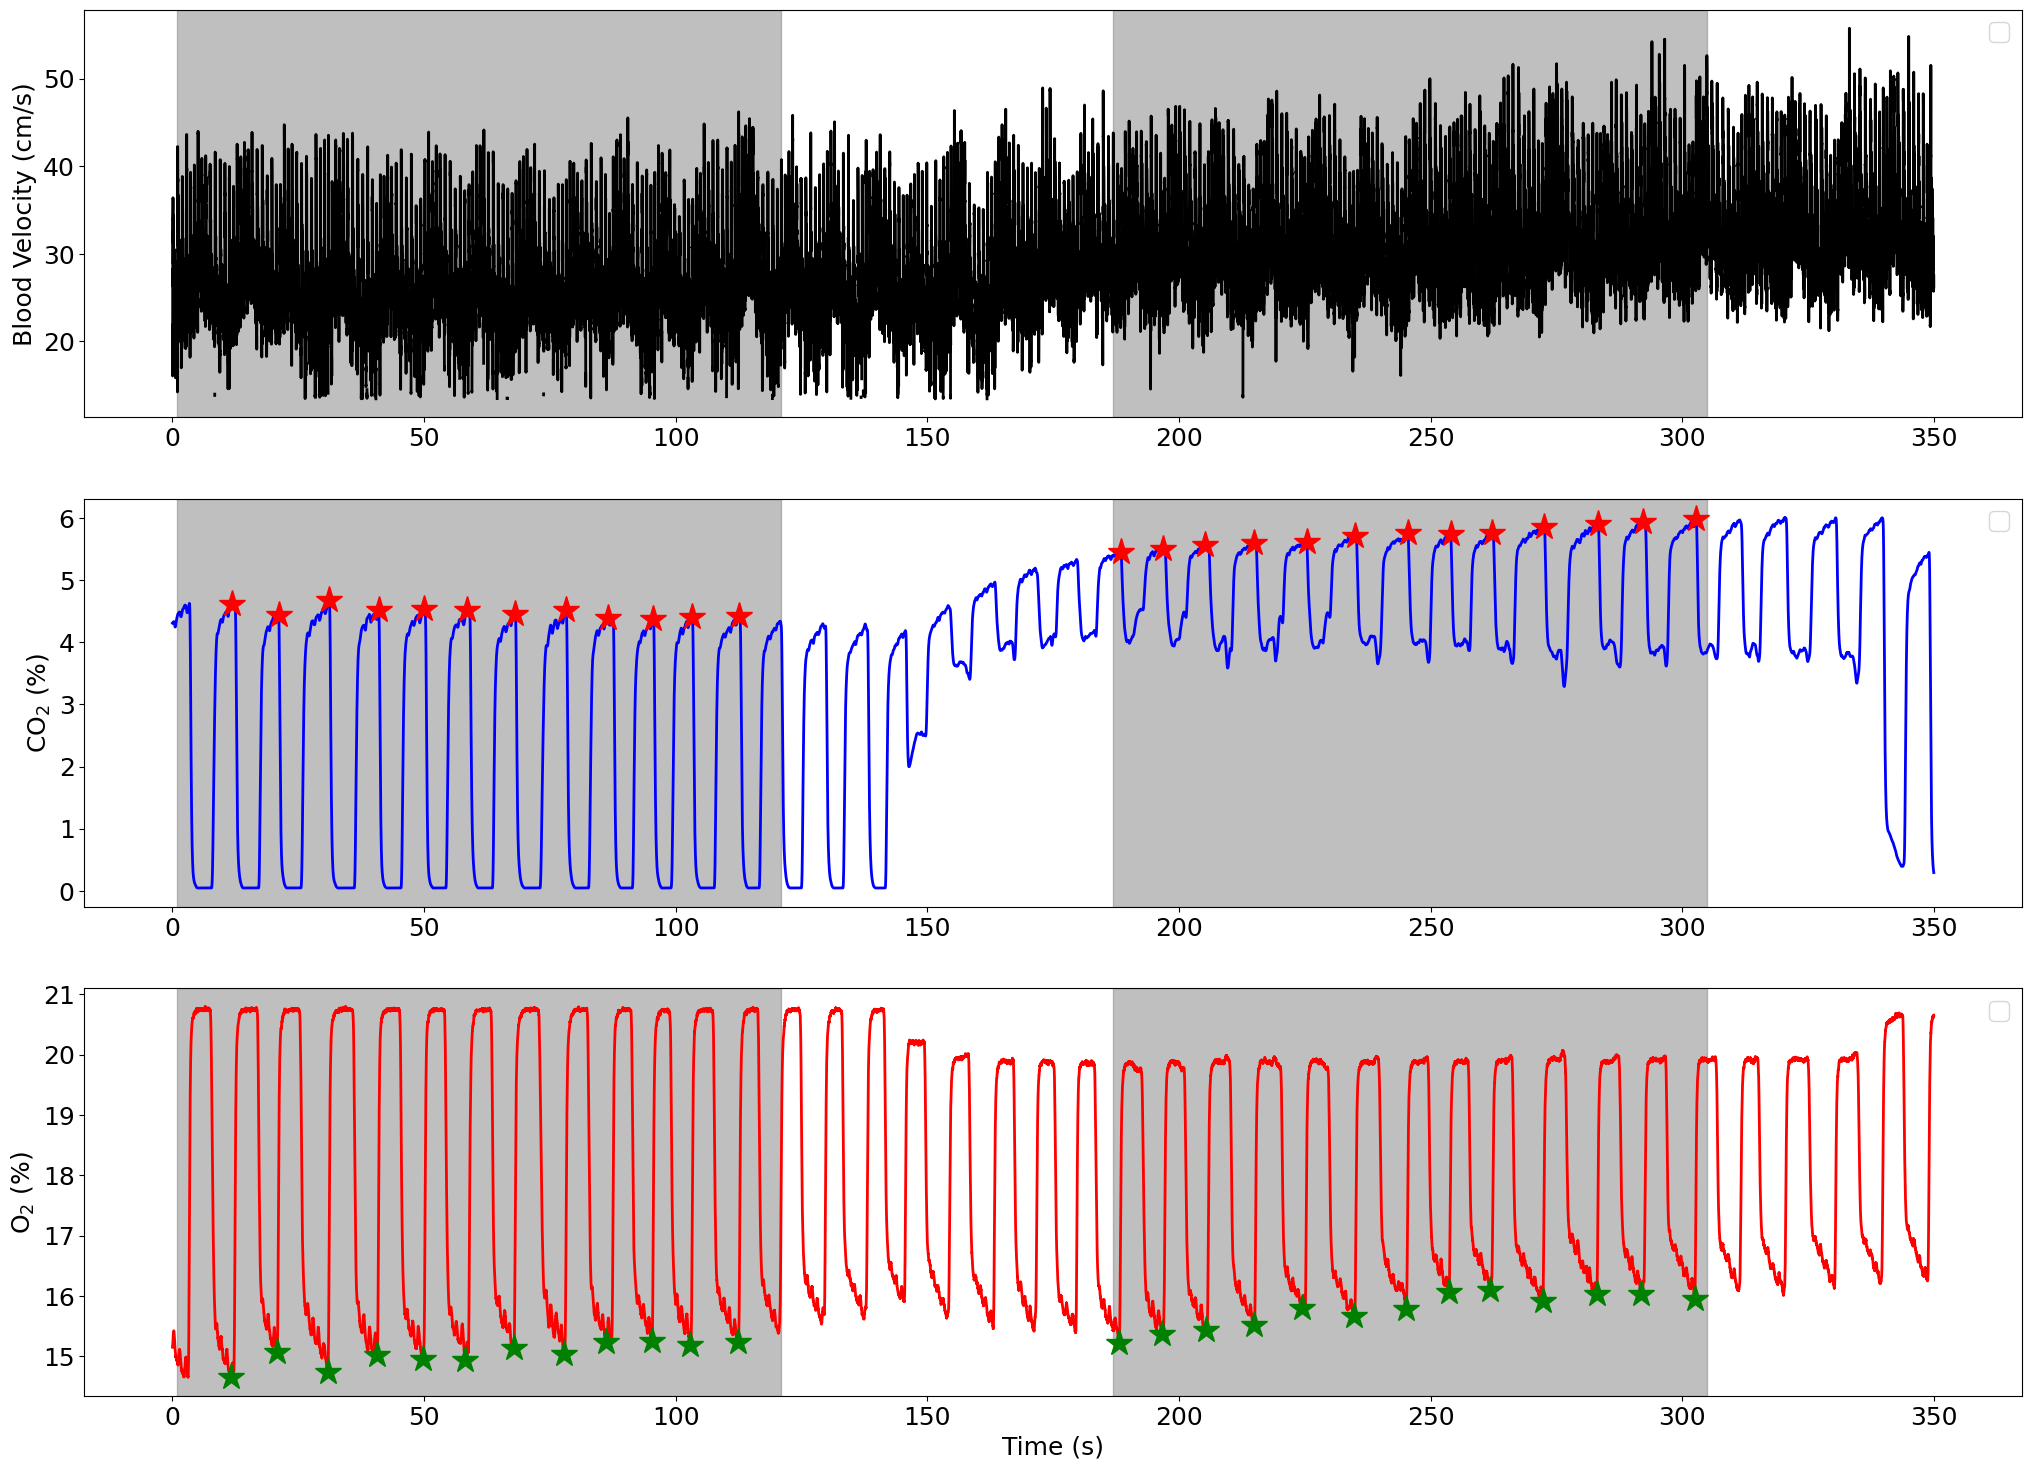

In [2067]:
#crop the data between comment_start_baseline1 and comment_end_5co2
df_all_cropped = cvr_func.get_data_window_between_comments(df, comment1_index=comment_start_baseline1, comment2_index=comment_end_5co2, crop_start_seconds=30, window_length_seconds=350)
#get raw TCD data
TCD_all = df_all_cropped.iloc[:,3].astype(float)*TCD_calibration_factor
TCD_all[TCD_all < TCD_threshold] = np.nan
#get raw CO2 and O2 data
CO2_all = df_all_cropped.iloc[:,1].astype(float)
O2_all = df_all_cropped.iloc[:,2].astype(float)
#get raw PPG 
PPG_all = df_all_cropped.iloc[:,4].astype(float)

CO2_all_correction_factor = CO2_all.index[0]/200


# reset the indices of the dataframes and divide by 200 to get the correct time in s
CO2_all.index = CO2_all.index/200
O2_all.index = O2_all.index/200
TCD_all.index = TCD_all.index/200


# adjust the indices of the CO2 peaks and valleys to match the new indices
CO2peaks_df['index'] = CO2peaks_df['index']/200
O2valleys_df['index'] = O2valleys_df['index']/200
CO2peaks_df_baseline1['index'] = CO2peaks_df_baseline1['index']/200
O2valleys_df_baseline1['index'] = O2valleys_df_baseline1['index']/200



#subtract the start time of the cropped data from the indices to get the correct time in s starting from 0
CO2_all.index = CO2_all.index - CO2_all.index[0]
O2_all.index = O2_all.index - O2_all.index[0]
TCD_all.index = TCD_all.index - TCD_all.index[0]


# subtract the start time of the cropped data from the indices to get the correct time in s starting from 0 for the pandas dataframes

CO2peaks_df['index'] = CO2peaks_df['index']-CO2_all_correction_factor
O2valleys_df['index'] = O2valleys_df['index']-CO2_all_correction_factor
CO2peaks_df_baseline1['index'] = CO2peaks_df_baseline1['index']-CO2_all_correction_factor
O2valleys_df_baseline1['index'] = O2valleys_df_baseline1['index']-CO2_all_correction_factor



# print the type and shape of CO2peaks_df
print(type(CO2_all))
print(CO2_all.shape)
print(type(CO2peaks_df))
print(CO2peaks_df.shape)



#plot
fig = plt.figure()

#plot parameters
fig.set_figheight(18)
fig.set_figwidth(25)
tfont = {'fontname':'Ariel'}
#set the axis numbers to be bigger
plt.rcParams.update({'font.size': 18})

#plot TCD MCAv
ax1 = fig.add_subplot(311)     
ax1.set_ylabel('Blood Velocity (cm/s)', fontsize=18, **tfont)
TCD_all.plot(c="black", lw=2)
ax1.legend('')
#remove the x-axis label
ax1.set_xlabel('')

#plot CO2 percentage
ax2 = fig.add_subplot(312)   
ax2.set_ylabel('CO$_{2}$ (%)', fontsize=18, **tfont)
CO2_all.plot(c="blue", lw=2)
CO2peaks_df_baseline1.plot(ax=ax2,x='index', y = 'val', marker='*',linestyle='None',markersize = 20.0, color = 'r')
CO2peaks_df.plot(ax=ax2,x='index', y = 'val', marker='*',linestyle='None',markersize = 20.0, color = 'r')
ax2.legend('')
ax2.set_xlabel('')

#plot O2 percentage
ax3 = fig.add_subplot(313)     
ax3.set_ylabel('O$_{2}$ (%)', fontsize=18, **tfont)
O2_all.plot(c="red", lw=2)
O2valleys_df.plot(ax=ax3,x='index', y = 'val', marker='*',linestyle='None',markersize = 20.0, color = 'g')
O2valleys_df_baseline1.plot(ax=ax3,x='index', y = 'val', marker='*',linestyle='None',markersize = 20.0, color = 'g')
ax3.legend('')
ax3.set_xlabel('Time (s)', fontsize=18, **tfont)


# add a shaded area to the plot to show the 5% CO2 breathing
ax1.axvspan(1, 121, color='gray', alpha=0.5)
ax1.axvspan(len_base1+20, len_base1+120+18, color='gray', alpha=0.5)
ax2.axvspan(1, 121, color='gray', alpha=0.5)
ax2.axvspan(len_base1+20, len_base1+120+18, color='gray', alpha=0.5)
ax3.axvspan(1, 121, color='gray', alpha=0.5)
ax3.axvspan(len_base1+20, len_base1+120+18, color='gray', alpha=0.5)

plt.show()

In [2068]:
# save the figure
fig.savefig('CVR_figures_' + filename + '_all.png')

findfont: Font family 'Ariel' not found.
findfont: Font family 'Ariel' not found.
findfont: Font family 'Ariel' not found.
findfont: Font family 'Ariel' not found.
findfont: Font family 'Ariel' not found.
